# Unsupervised Learning
## Dimentionality Reduction
This notebook introduces unsupervised learning methods; the dimensionality reduction, namely the PCA, tSNE, and UMAP.

The dataset is the Wine dataset from the UC Irvine Machine Learning repository;

About the dataset:  
"These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines."

It is unlabeled dataset and we will explore it with unsupervised learning.

Table of contents:  
1. Opening Slides; t-SNE vs UMAP
2. Import data and libraries
3. Exploratory Data Analysis
4. Data Preprocessing
5. Models Comparison
6. Models Evaluation
7. Conclusion
8. Resources

# Opening slides; t-SNE vs UMAP

The main theme of this notebook is to compare the performance of PCA, t-SNE, and UMAP.  
However, before diving into the comparison, I will first review the basic concepts and algorithms of t-SNE and UMAP (in 6 slides below).  

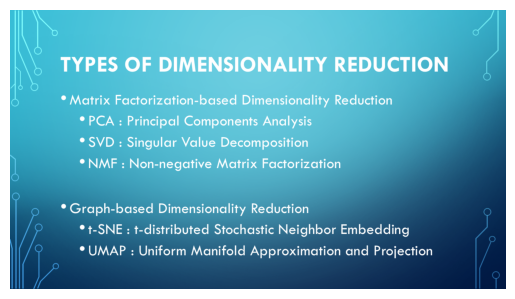

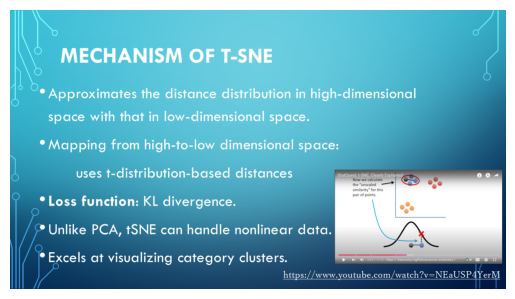

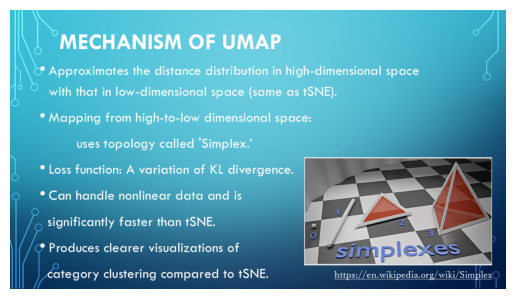

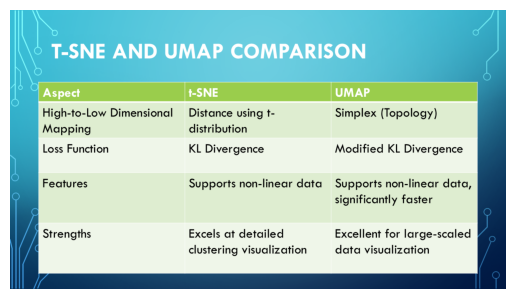

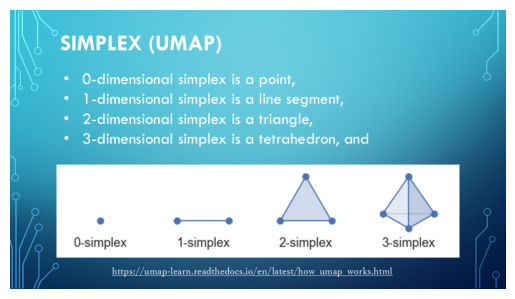

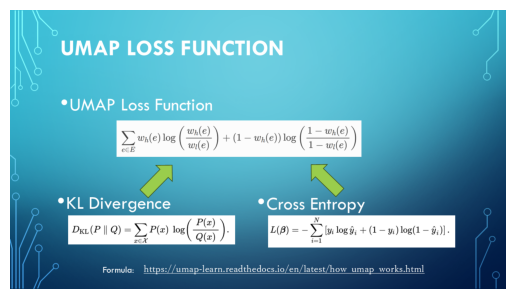

In [1]:
import os
import matplotlib.pyplot as plt

# slides directory
slides_dir = '/mnt/c/Users/u1111/Desktop/Be_Boulder/2.Unsupervised_Learning/W5_Final/tSNEvsUMAP'

png_files = sorted(os.listdir(slides_dir))

# print slides
for slide in png_files:
    file_path = os.path.join(slides_dir, slide)
    img = plt.imread(file_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()   

# Import data and libraries

We import the Wine dataset from UCI Machine Learning Repository.

In [2]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
wine_X = wine.data.features 
wine_y = wine.data.targets 

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Linear Algebra and Data Processing 
import numpy as np
import pandas as pd

# Plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Sklearn
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# UMAP
# For the plotting functionality 
!pip install umap-learn[plot]
import umap
import umap.plot

# For the best possible performance for UMAP
import pynndescent

Defaulting to user installation because normal site-packages is not writeable


2024-11-29 17:16:27.771948: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732868188.227294     738 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732868188.296927     738 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-29 17:16:29.225949: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ubuntu/.local/lib/python3.10/site-packages/dask/dataframe/__init__.py:49: FutureWarning:


Dask dataframe query plannin

In [4]:
# Training data
df=wine_X

# Type of data
print(type(df))

# Dimensions
print("DataFrame dimensions: ", df.shape)

# First 5 entries of the training data
df.head()

<class 'pandas.core.frame.DataFrame'>
DataFrame dimensions:  (178, 13)


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Exploratory Data Analysis (EDA)

In [5]:
print(f'Missing values in dataset: {df.isna().sum().sum()}')
print(f'Duplicates in dataset: {df.duplicated().sum()}, ({np.round(100*df.duplicated().sum()/len(df),1)}%)')
print(f'Data types: {df.dtypes.unique()}')

Missing values in dataset: 0
Duplicates in dataset: 0, (0.0%)
Data types: [dtype('float64') dtype('int64')]


# Data Preprocessing

It is good practice to scale our data, so that we don't bias our methods later on.

In [6]:
# This scales each column to have mean=0 and standard deviation=1
ss = StandardScaler()

# Apply scaling
scaled_X = pd.DataFrame(ss.fit_transform(df), columns=df.columns)

# Models Comparison
## 1. PCA

**Principal Component Analysis (PCA)** was the first dimensionality reduction technique discovered (by **Karl Pearson** - the guy from Pearson's correlation coefficient dates back to **1901**).

It is **fast**, **easy to implement**, and **easy to interpret**.

PCA works by finding a low dimensional subspace that maximizes the variance of the data in that subspace and performing a linear projection. This basically means the data will be as spread out as possible, without changing the relationship between the data points. This allows us to find patterns or identify clusters if any exist.



In [7]:
# instantiate PCA
pca = PCA(n_components=2) # n_components 

# fit(X, y=none): fit the model with X
pca.fit(scaled_X) 

# By instantiating PCA, the instance 'pca' holds information such as below;
# principal components (pca.components_)
print('Principal components')
print(pca.explained_variance_ratio_)

# variance ratio (pca.explained_variance_ratio_)
print('Variance ratio')
print(pca.singular_values_)

# transform(X, y=none): apply dimensinality reduction to the input data
# X is projected on the first PC previously extracted from a training set
# pca.transform(scaled_X)

Principal components
[0.36198848 0.1920749 ]
Variance ratio
[28.94203422 21.08225141]


In [8]:
# We can do both fit and transform at once
# fit_transform(X, y=none): Fit the model with X and apply the dimensionality reduction on X.
X_pca = pca.fit_transform(scaled_X)

# convert to dataframe
principal_df = pd.DataFrame(data = X_pca, columns=['PC1', 'PC2'])

# shape and preview
print(principal_df.shape)
print('X features mapped into low (three) dimensional space')
principal_df.head()

(178, 2)
X features mapped into low (three) dimensional space


,PC1,PC2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


The new columns are called Principal Components (PCs) and give the coordinates of the data in the new smaller space.
The original wine data contains 13 columns (dimensions) and PCA decreases the dimensions down to 3. These three columns still possess the feature of the original data.

### PCA plot in 2d

Text(0, 0.5, 'PC2')

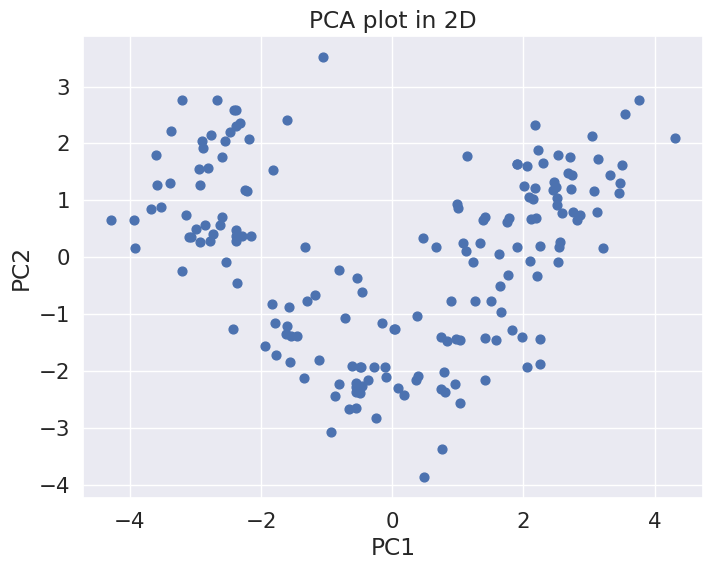

In [9]:
# figure size
plt.figure(figsize=(8,6))

# scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], s=40)

# aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

Notes:  
・Notice how these points have no colors (yet) because we don't know what their classes are. This is what makes it an **unsupervised method**.  

・We know our dataset falls naturally into 3 classes (3 types of wine), so we assign colors by **clustering** the data into 3 groups using techniques such as **K-Means**. 

## 2. K-Means Clustering
K-Means clustering is an iterative clustering algorithm that works as follows:  

1. Choose coordinates (e.g., randomly) for the locations of the k centroids.
2. Group datapoints together by finding the nearest centroid. (These will always be k groups).
3. Calculate the new center of each centroid by taking the mean position of datapoints in each group.
4. Iterative until the centroids stop moving by a significant amount.

K-Means is popular because it is a reliable (always converges) and relatively fast algorithm. The main downside is that you have to decide what value of k should be beforehand. (Although there are techniques to help with this).

In [10]:
# K-Means
kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=42)

# Train and make predictions
clusters = kmeans.fit_predict(scaled_X)

# Cluster centers
centroids = kmeans.cluster_centers_
centroid_pca = pca.transform(centroids)

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



### PCA plot in 2D colored by cluster

Text(0, 0.5, 'PC2')

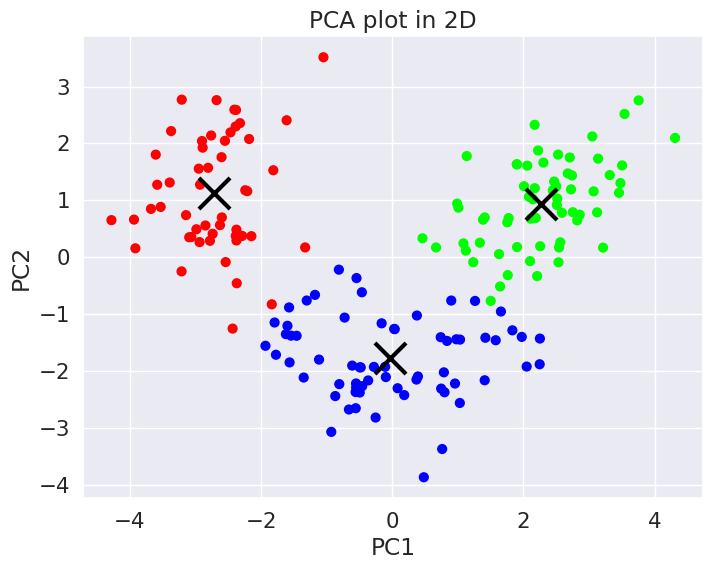

In [11]:
# figure size
plt.figure(figsize=(8,6))

# scatter plot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap='brg', s=40)
plt.scatter(x=centroid_pca[:,0], y=centroid_pca[:,1], marker='x', s=500, linewidths=3, color='black')

# aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

We have three clusters on 2 dimensional plane, where we only see the two largest variances, PC1 and PC2.  

Now let's plot in 3D to see how the variances look like including PC3.

### PCA plot in 3D

In [12]:
# PCA
pca = PCA(n_components=3)
components = pca.fit_transform(scaled_X)

# 3D scatterplot
fig = px.scatter_3d(
    components, 
    x=0, y=1, z=2, 
    color=clusters, 
    size=0.1 * np.abs(components[:, 0]),
    #size=0.1*np.ones(len(X)), 
    opacity=1,
    title='PCA plot in 3D', 
    labels={'0': 'PC1', '1': 'PC2', '2': 'PC3'},
    width=650, height=500
)
fig.show()

**Explained variance**  

Explained variance shows how much of the variance/spread of the data is captured in each dimension, i.e., how important each additional principal component is to the original data representation.  

The sum of the ratio of PCs become 1.

In [13]:
# PCA
pca = PCA(n_components=13) # calculate all the principal components
pca.fit(scaled_X)

# explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# print the result
for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: Explained Variance = {ev:.2f}, Cummulative Variance = {cv:.2f}")

PC1: Explained Variance = 0.36, Cummulative Variance = 0.36
PC2: Explained Variance = 0.19, Cummulative Variance = 0.55
PC3: Explained Variance = 0.11, Cummulative Variance = 0.67
PC4: Explained Variance = 0.07, Cummulative Variance = 0.74
PC5: Explained Variance = 0.07, Cummulative Variance = 0.80
PC6: Explained Variance = 0.05, Cummulative Variance = 0.85
PC7: Explained Variance = 0.04, Cummulative Variance = 0.89
PC8: Explained Variance = 0.03, Cummulative Variance = 0.92
PC9: Explained Variance = 0.02, Cummulative Variance = 0.94
PC10: Explained Variance = 0.02, Cummulative Variance = 0.96
PC11: Explained Variance = 0.02, Cummulative Variance = 0.98
PC12: Explained Variance = 0.01, Cummulative Variance = 0.99
PC13: Explained Variance = 0.01, Cummulative Variance = 1.00


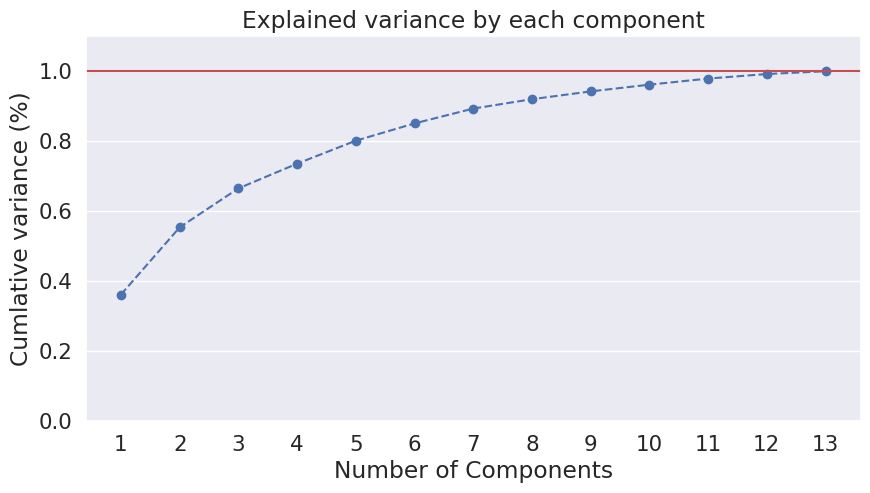

In [14]:
# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+scaled_X.shape[1], step=1)
yi = np.cumsum(pca.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# aethetics
plt.ylim(0.0, 1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+scaled_X.shape[1], step=1))
plt.ylabel('Cumlative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

It is interesting to see that with just **2 components** we capture **over 50%** of the variance. And by moving up to 3 components, we get 2 thirds of the variance.

For this reason, sometimes PCA is used for **feature selection**. For very big datasets with hundreds of features, it can take a long time to train models with some features not adding much value. A solution is to reduce the number of columns by using principal components from PCA. The number of components is normally chosen by looking at the explained variance graph (e.g., a minimum of 60% might be required).

# t-SNE
t-SNE, which stands for **t-distributed Stochastic Neighbor Embedding** was proposed more recently by Laurens van der Maaten and Geoffery Hinton in their 2008 paper. This works in similar way to PCA but has some key differences:

　・Firstly, this is a **stochastic method**. So if you run multiple t-SNE plots on the same dataset it can look different.  
 
　・Another difference is that that is a **iterative method**. It works by repeatedly moving datapoints closer or further away from each other depending on how 'similar' they are. 

 ・The new representation is **non-linear**. This makes it harder to interpret but it can be very effective at 'unravelling' highly non-linear data.

The main downside to t-SNE is that is **very slow** compare to other dimensionality techniques. This is because it makes calculations on a pair-wise basis, which does not scale well with large datasets.

In [15]:
# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(scaled_X)

# convert to dataframe
tsne_df = pd.DataFrame(data=X_tsne, columns=['tsne comp. 1', 'tsne comp. 2'])

# shape and preview
print(tsne_df.shape)
tsne_df.head()

(178, 2)


,tsne comp. 1,tsne comp. 2
0,9.782672,-7.192386
1,5.999963,-5.729690
2,6.168435,-10.276811
3,9.123189,-9.922932
4,2.152080,-9.484663


### t-SNE plot in 2D colored by class

Like PCA, t-SNE is an **unsupervised algorithm**, however we will use the same k-Means clusters from before to color code the data points. 

Text(0, 0.5, 'tsne component 2')

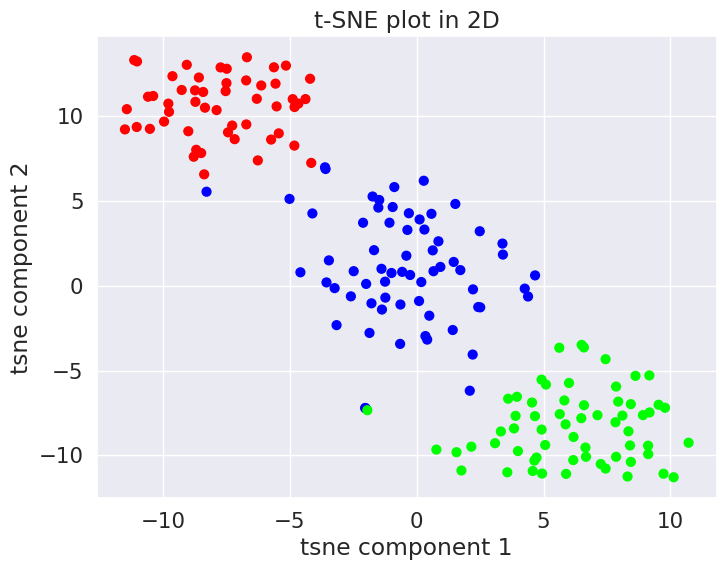

In [16]:
# figure size
plt.figure(figsize=(8,6))

# scatter plot
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=clusters, cmap='brg', s=40)

# aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

We can't plot the centroids like last time because t-SNE has no transform attribute, i.e., tsne.transform(X) does not exist. This is because t-SNE is an iterative method and does not learn a single repeatable transformation.

### t-SNE plot in 3D

In [17]:
# t-SNE
tsne = TSNE(n_components=3)
components_tsne = tsne.fit_transform(scaled_X)

# 3D scatter plot
fig = px.scatter_3d(
    components_tsne, 
    x=0, y=1, z=2, 
    color=clusters, 
    size=0.1 * np.abs(components[:, 0]), # 
    # size=0.1*np.ones(len(X)), 
    opacity=1,
    title = 't-SNE plot in 3D',
    labels = {'0': 'comp. 1', '1': 'comp. 2', '2': 'comp. 3'},
    width=650, height=500
)
fig.show()

If you run this cell several times, you will see that the 3D t-SNE plot looks quite different each time.

### UMAP

**UMAP**, which stands for **Uniform Manifold Approximation and Projection** was proposed by Leland McInnes, John Healy and James Melville in their 2018 paper.

It is similar to t-SNE in that it learns a non-linear mapping that preserves clusters but its main advantage is that it is **significantly faster**. It also tends to do better at preserving global structure of the data compared to t-SNE.

In [18]:
# UMAP
um = umap.UMAP()
X_fit = um.fit(scaled_X)
X_umap = um.transform(scaled_X)

# convert to dataframe
umap_df = pd.DataFrame(data=X_umap, columns = ['umap comp. 1', 'umap comp. 2'])

# shape and preview
print(umap_df.shape)
umap_df.head()

(178, 2)


,umap comp. 1,umap comp. 2
0,9.546901,3.649000
1,9.093485,2.396598
2,10.188019,2.395438
3,10.818363,3.130072
4,9.875845,1.250576


### UMAP plot in 2D colored by clusters

Text(0, 0.5, 'umap component 2')

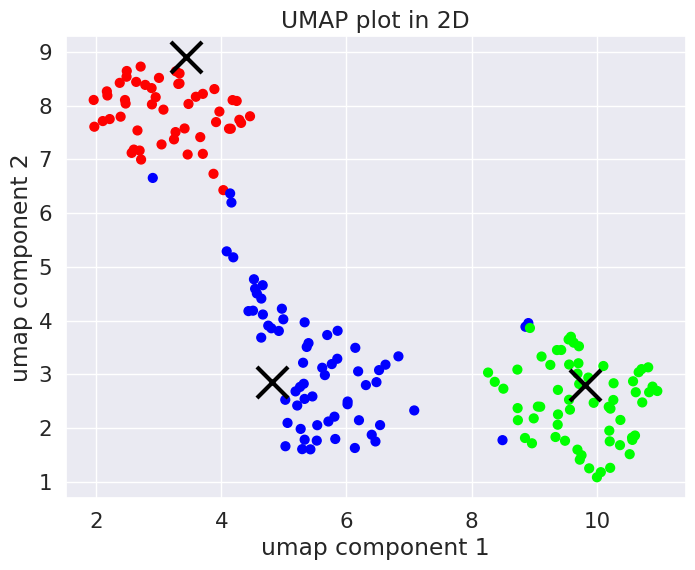

In [19]:
# figure size
plt.figure(figsize=(8,6))

# scatter plot
plt.scatter(umap_df.iloc[:,0], umap_df.iloc[:,1], c=clusters, cmap='brg', s=40)

# centroids
centroids_umap = um.transform(centroids)
plt.scatter(x=centroids_umap[:, 0], y=centroids_umap[:, 1], marker='x', s=500, linewidths=3, color='black')

# aesthetics
plt.title('UMAP plot in 2D')
plt.xlabel('umap component 1')
plt.ylabel('umap component 2')

Notes:
1. We see that the positions of the clusters are closer to what they are like in the PCA plot. This is what we mean by saying the global structure is better preserved.
2. UMAP does have a transform attribute so we can plot the centroids on the graph too.

### UMAP plot in 3D

In [20]:
# UMAP
um = umap.UMAP(n_components=3)
components_umap = um.fit_transform(scaled_X)

# 3D scatter plot
fig = px.scatter_3d(
    components_umap,
    x=0, y=1, z=2,
    color=clusters,
    size=0.1 * np.abs(components[:, 0]), # 
    # size=0.1*np.ones(len(X)), opacity=1,
    title='UMAP plot in 3D',
    labels={'0': 'comp. 1', '1': 'comp. 2', '2': 'comp. 3'},
    width=650, height=500
)
fig.show()

Compared to 3D-PCA and 3D-tSNE, 3D-UMAP clearly separates the three clusters with distinct distances between them. While PCA and t-SNE also reveal three clusters when color-coded, the clusters are closer together or even overlap, making it difficult to distinguish them without color differentiation.

### UMAP connectivity plot

UMAP can also be represented as a **connected graph**, which can be useful to get insights into the topological embedding.

<Axes: >

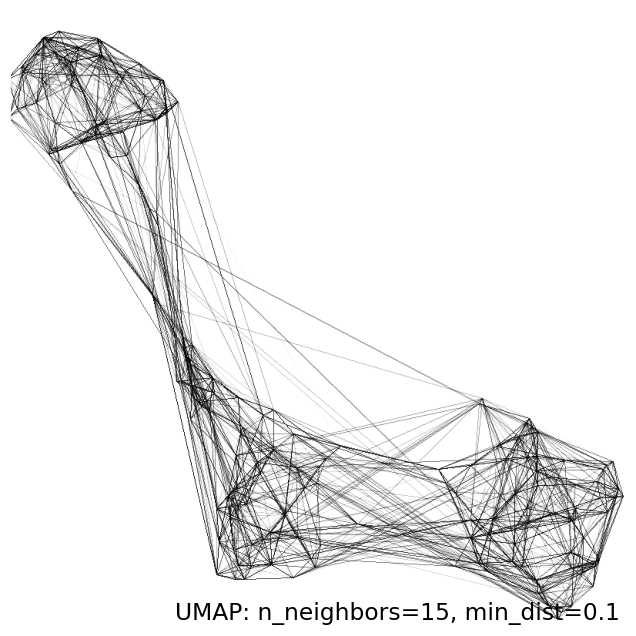

In [21]:
# connectivity plot
umap.plot.connectivity(X_fit, show_points=False)

/home/ubuntu/.local/lib/python3.10/site-packages/umap/plot.py:895: UserWarning:

Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!



<Axes: >

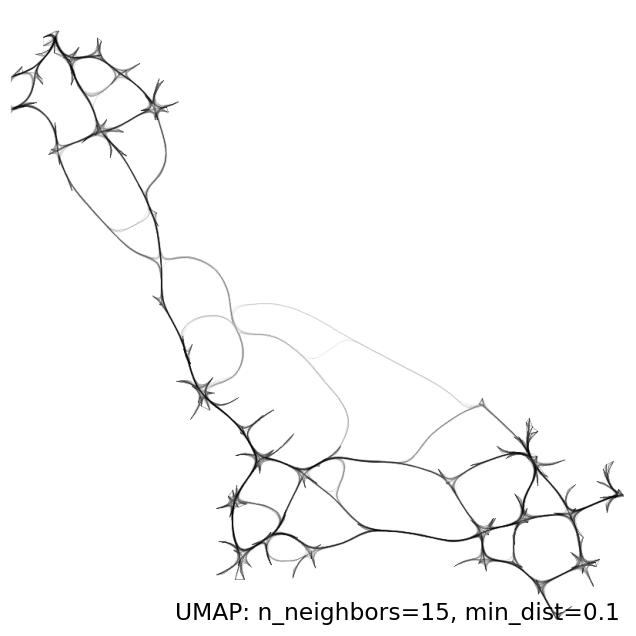

In [22]:
# edge-bundling can provide a simplified view of the connections
umap.plot.connectivity(X_fit, show_points=False, edge_bundling='hammer')

# Evaluating unsupervised model by ...
### RSME

To evaluate the performance of PCA, we will evaluate the effectiveness of dimensionality reduction. Specifically, we will calculate the RMSE between the "original X" and the "X reconstructed by mapping the dimensionally reduced X back to the original space."

In [23]:
# PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(scaled_X)

# In order to calculate RMSE, we map the dimensionally reduced data back into the original dimensionality.
X_reconstructed = pca.inverse_transform(X_pca)

# calculate each RMSE
pca_rmse = np.sqrt(mean_squared_error(scaled_X, X_reconstructed))
print(f"PCA RMSE: {pca_rmse}")

PCA RMSE: 0.5785328954071216


### Trustworthiness
Trustworthiness is an evaluation matrice which can be used for tSNE and UMAP.  
It evaluates how the neighboring relationship being retained after mapping into reduced dimensionality.
reference:  
https://scikit-learn.org/1.5/modules/generated/sklearn.manifold.trustworthiness.html

In [24]:
# Below cell uses code from scikit-learn, which is licensed under the BSD 3-Clause License.
# Please refer to the license text in the original scikit-learn repository for more details:
# https://github.com/scikit-learn/scikit-learn/blob/main/COPYING

# Code source
# https://github.com/scikit-learn/scikit-learn/blob/ccd3331f7eb3468ac96222dc5350e58c58ccba20/sklearn/manifold/t_sne.py#L394

In [25]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import NearestNeighbors
import numpy as np

def trustworthiness(X, X_embedded, n_neighbors=5, metric='euclidean'):
    r"""Expresses to what extent the local structure is retained.

    The trustworthiness is within [0, 1]. It is defined as:

        T(k) = 1 - (2 / (nk (2n - 3k - 1))) * sum_i sum_{j in N_i^k} max(0, (r(i, j) - k))

    Parameters
    ----------
    X : array, shape (n_samples, n_features) or (n_samples, n_samples)
        Original data in the input space.

    X_embedded : array, shape (n_samples, n_components)
        Data embedded in the lower-dimensional space.

    n_neighbors : int, optional (default: 5)
        Number of neighbors k to consider.

    metric : string, optional, default 'euclidean'
        Metric to use for computing pairwise distances in the input space.

    Returns
    -------
    trustworthiness : float
        Trustworthiness of the low-dimensional embedding.
    """
    dist_X = pairwise_distances(X, metric=metric)
    np.fill_diagonal(dist_X, np.inf)  # Exclude self from neighbors
    ind_X = np.argsort(dist_X, axis=1)

    # Get nearest neighbors in the embedded space
    ind_X_embedded = NearestNeighbors(n_neighbors=n_neighbors).fit(X_embedded).kneighbors(
        return_distance=False
    )

    # Compute trustworthiness
    n_samples = X.shape[0]
    inverted_index = np.zeros((n_samples, n_samples), dtype=int)
    ordered_indices = np.arange(n_samples)
    inverted_index[ordered_indices[:, np.newaxis], ind_X] = np.arange(1, n_samples + 1)
    ranks = inverted_index[ordered_indices[:, np.newaxis], ind_X_embedded] - n_neighbors
    t = np.sum(ranks[ranks > 0])
    t = 1.0 - t * (2.0 / (n_samples * n_neighbors * (2.0 * n_samples - 3.0 * n_neighbors - 1.0)))
    return t


In [26]:
# t-SNE
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(scaled_X)

tsne_tw = trustworthiness(scaled_X, X_tsne, n_neighbors=3, metric='euclidean')
print('t-SNE Trustworthiness: ', tsne_tw)

# UMAP
um = umap.UMAP(n_components=3)
X_umap = um.fit_transform(scaled_X)

umap_tw = trustworthiness(scaled_X, X_umap, n_neighbors=3, metric='euclidean')
print('UMAP Trustworthiness: ', umap_tw)


t-SNE Trustworthiness:  0.9900738239050897
UMAP Trustworthiness:  0.9736745253404343


# Conclusion
Numerically, both t-SNE and UMAP achieved trustworthiness scores close to 1, with t-SNE having a slightly higher score. This can be attributed to the fact that t-SNE calculates the distances between data points based on t-distributions, while UMAP, when reproducing the neighborhood relationships based on graph theory using the simplex method, determines whether nodes are connected or not based on whether the data points are "close" or "far" (rather than measuring the actual distances). Consequently, t-SNE demonstrates a slightly better ability to preserve neighborhood relationships in low-dimensional space according to the trustworthiness metric.

However, visually, UMAP tends to separate clusters more explicitly, making the structure of the data more intuitive. This clear separation, combined with UMAP's faster processing speed, makes it a preferred choice for many user









I would like to thank Samuel Cortinhas for providing the great notebook, as well as all the reference below explaining how the dimensinality reduction on those algorithms work.  

Thank you for reading!

# Resources
A deeper dive into UMAP theory  
https://pair-code.github.io/understanding-umap/  

Uniform Manifold Approximation and Projection  
https://github.com/lmcinnes/umap  

StatQuest: tSNE, Clearly Explained  
https://www.youtube.com/watch?v=NEaUSP4YerM  

Wikipedia: Simplex  
https://en.wikipedia.org/wiki/Simplex  

Intro to PCA, t-SNE & UMAP by Samuel Cortinhas
https://www.kaggle.com/code/samuelcortinhas/intro-to-pca-t-sne-umap/notebook  

How UMAP Works  
https://umap-learn.readthedocs.io/en/latest/how_umap_works.html


EOD